In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import io
from PIL import Image

# Funciones auxiliares
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def draw(I, size_factor, dpi=30, **kwargs):
    fig = plt.figure(dpi=dpi)
    fig.set_size_inches(I.shape[1]/dpi*size_factor, I.shape[0]/dpi*size_factor)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(I, **kwargs)

https://editor.p5js.org/pabloriera/full/9UqjrRu3k

# Taller de Interpolación




## Ejercicio 1: Interpolación de valores en 1D

A continuación probaremos distintos métodos de interpolación utilizando la función [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) de scipy.

Completar el código para obtener la interpolación de la función $fn$ en los puntos $x$, en base a los puntos conocidos $xp$ e $yp$, para interpolación lineal y cúbica. Computar el error cuadrático medio y interpretar los resultadosd de qué métodos da menos error para cada función. Intentar graficar la función original y sus puntos interpolados si es necesario para reforzar la interpretación.

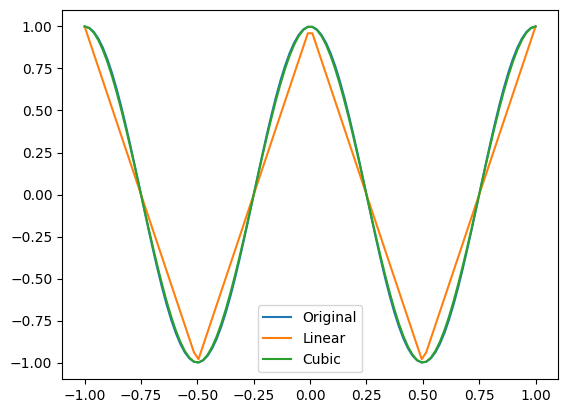

In [ ]:
fn = lambda x: np.cos(2*np.pi*x)

x = np.linspace(-1,1,100)
xp = np.array([-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0])
yp = fn(xp)
y_total = fn(x)
f_linear = interp1d(xp, yp, 'linear')
y_linear = f_linear(x)
f_cubic = interp1d(xp, yp, 'cubic')
y_cubic = f_cubic(x)

error_linear = np.mean((y_linear - y_total)**2)
error_cubic = np.mean((y_cubic - y_total)**2)

plt.plot(x, y_total, label='Original')
plt.plot(x, y_linear, label='Linear')
plt.plot(x, y_cubic, label='Cubic')
plt.legend()
plt.show()

assert np.allclose(error_linear, 0.022536222161977856) and np.allclose(error_cubic, 0.0001781893720147293)

In [ ]:
fn = lambda x: np.int32(x>0)

x = np.linspace(-1,1,100)
xp = np.array([-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0])

yp = fn(xp)
y_total = fn(x)
f_linear = interp1d(xp, yp, 'linear')
y_linear = f_linear(x)
f_cubic = interp1d(xp, yp, 'cubic')
y_cubic = f_cubic(x)

error_linear = np.mean((y_linear - y_total)**2)
error_cubic = np.mean((y_cubic - y_total)**2)

assert np.allclose(error_linear, 0.04118355269870416) and np.allclose(error_cubic, 0.044469665111835796)

## Ejercicio 2: Zoom digital

Queremos implementar una función para completar pixeles intermedios en una imagen y poder aumentar su resolución o dicho de otra forma hacer zoom.


### Interpolación de imagenes: Vecino más cercano

Cada pixel de la imagen original es copiado en sus vecinos:

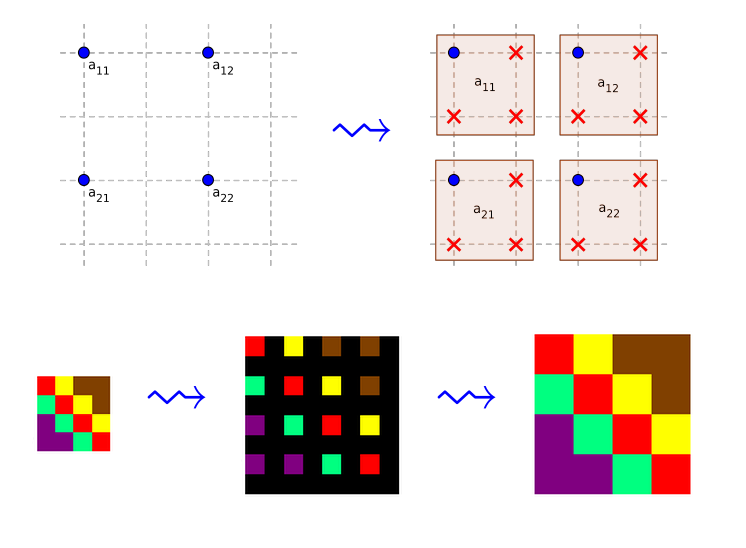

## Interpolación de imagenes: Función interpoladora

Para cada fila de la imagen, construimos una función interpoladora $\Phi_{\tilde{y}}(x)$ para la función $f(x,\tilde{y})$, con $\tilde{y}$ fijo y hallamos los valores de los píxeles intermedios

Luego para cada columna de la imagen (incluso las columnas interpoladas previamente), calculamos la función interpoladora $\Phi_{\tilde{x}}(y)$ para la función $f(\tilde{x}, y)$ e interpolamos en los píxeles intermedios

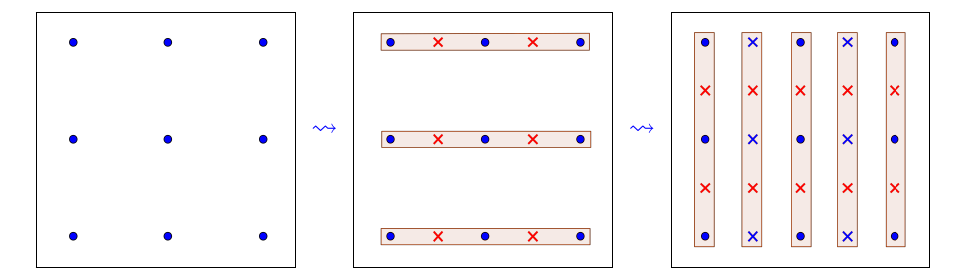

Bajemos unas imágenes

In [ ]:
!wget -O zebra.jpg https://www.dropbox.com/s/hjuggfgm4nhwtz6/zebra2.jpg
!wget -O noise.png https://cdn.hashnode.com/res/hashnode/image/upload/v1675585055062/e0597ce2-18fb-4b34-bb7c-c99b491174c8.png

--2024-06-25 00:12:35--  https://www.dropbox.com/s/hjuggfgm4nhwtz6/zebra2.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/yxg3r256kk8xtgs1z4qb5/zebra2.jpg?rlkey=kq1bk3zckg2sghziqwz2k5rtl [following]
--2024-06-25 00:12:35--  https://www.dropbox.com/scl/fi/yxg3r256kk8xtgs1z4qb5/zebra2.jpg?rlkey=kq1bk3zckg2sghziqwz2k5rtl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5e2bdcec3768618c8b82fc66f0.dl.dropboxusercontent.com/cd/0/inline/CVeG6tETIH1CXrzBdBSvDlNE3G6ms_dxtOmyEjWQKMWbXusq9AFxP-jbyuh0NdQ-yemExPF0chTR6N6Q5-I3XLoeYFXYGv_KFpEGabKVMJM4EfabmfFzq3CFjH5uGelnyw70zQ45AMOIV1YCuGCZmlWb/file# [following]
--2024-06-25 00:12:35--  https://uc5e2bdcec3768618c8b82fc66f0.dl.dropboxusercontent.com/cd/0/inline/CVeG6tE

Imagen original

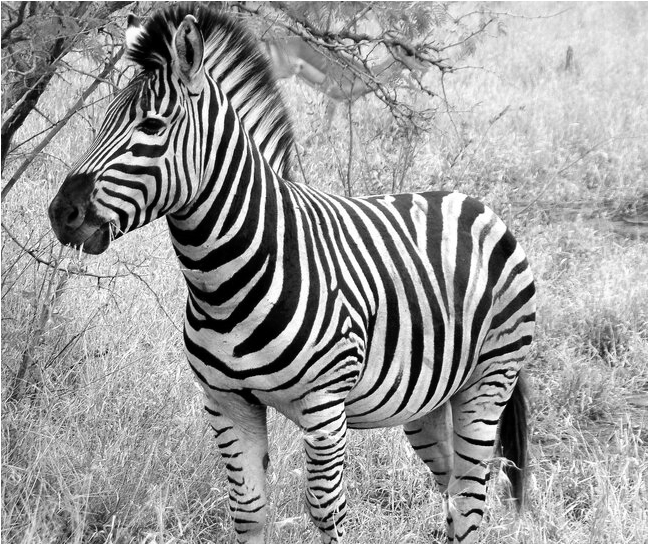

In [ ]:
I = plt.imread('zebra.jpg')
I = rgb2gray(I).astype('uint8')
draw(I,1,dpi=10, interpolation='none', cmap='gray');

Imagen _downsampleada_ con un factor 2 de forma naive.

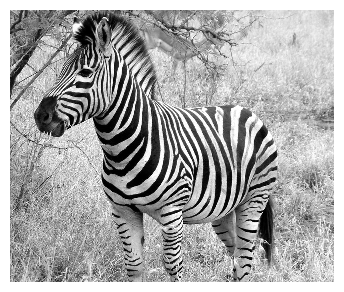

In [ ]:
factor = 2
I_downsampled = I[::factor,::factor]
draw(I_downsampled,1, 100, interpolation='none', cmap='gray');

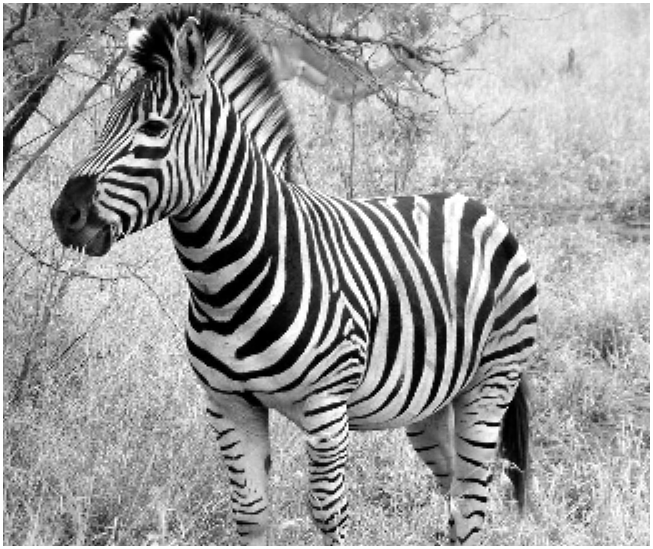

In [ ]:
I_interpolada = interpolate_image(I_downsampled,2, kind='linear')
draw(I_interpolada, 1, interpolation='none', cmap='gray');

### Implementación

Implementar una función para interpolar imágenes primero por filas y luego por columnas. Tener en cuenta que la misma debe soportar los tres tipos de técnicas vistas: vecinos, bilineal y bicúbica.
Considerar el uso de la función _interp1d_ de scipy.



In [ ]:
# el argumento kind de nuestra función es el kind que debe tomar interp1d.
def interpolate_image(img, factor=2, kind='linear'):

    height = img.shape[0]
    width = img.shape[1]

    img_interp = np.zeros(((height-1) * factor+1, (width-1) * factor+1))

    # Copiamos los pixeles originales adecuadamente
    # Recordar [start:stop:step, start:stop:step]
    img_interp[::factor, ::factor] = img

    new_width = np.shape(img_interp)[1]
    new_height = np.shape(img_interp)[0]

    xp_filas = np.arange(0,np.shape(img_interp)[1], factor, dtype=int) # Indices para los cuales sabemos el brillo que corresponde
    xp_columnas = np.arange(0,np.shape(img_interp)[0], factor, dtype = int) # Indices para los cuales sabemos el brillo que corresponde
    for i in range(height):

        yp = img[i] # Devuelve la intensidad correspondiente a cada x
        f_inter = interp1d(xp_filas,img[i], kind)
        img_interp[xp_filas[i]] = f_inter(np.arange(0, new_width))

    # Interpolación por columnas


    for j in range(img_interp.shape[1]):
        yp = img_interp[::factor,j]
        f_inter = interp1d(xp_columnas,yp, kind)
        img_interp[:,j] = f_inter(np.arange(0,new_height))


    ## Clippeo valores fuera de 0 y 255
    img_interp = np.maximum(img_interp, 0)
    img_interp = np.minimum(img_interp, 255)

    return np.around(img_interp).astype('uint8')

def ecm(img1, img2):
    return np.mean( (img1.astype('float') - img2.astype('float')) ** 2 )

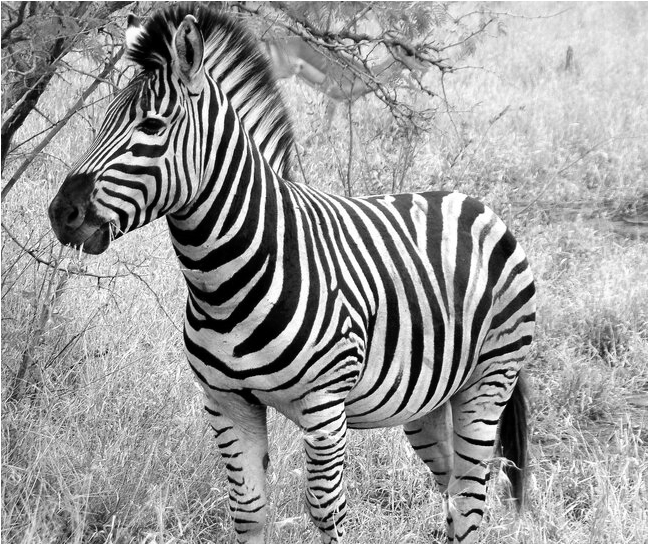

In [ ]:
I = plt.imread('zebra.jpg')
I = rgb2gray(I).astype('uint8')
draw(I,1,dpi=10, interpolation='none', cmap='gray');

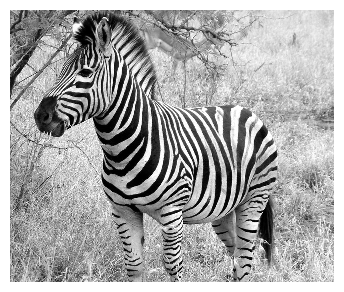

In [ ]:
factor = 2
I_downsampled = I[::factor,::factor]
draw(I_downsampled,1, 100, interpolation='none', cmap='gray');

Calculamos el error

In [ ]:
I_interpolada = interpolate_image(I_downsampled,2, kind='linear')
ecm(I_interpolada, I)

352.9419875270764

In [ ]:
assert np.allclose(ecm(I_interpolada, I), 352.9419875270764)
print(ecm(in))

In [ ]:
I_interpolada = interpolate_image(I_downsampled,2, kind='cubic')
ecm(I_interpolada, I)

363.56529783303586

In [ ]:
assert np.allclose(ecm(I_interpolada, I), 363.56529783303586)

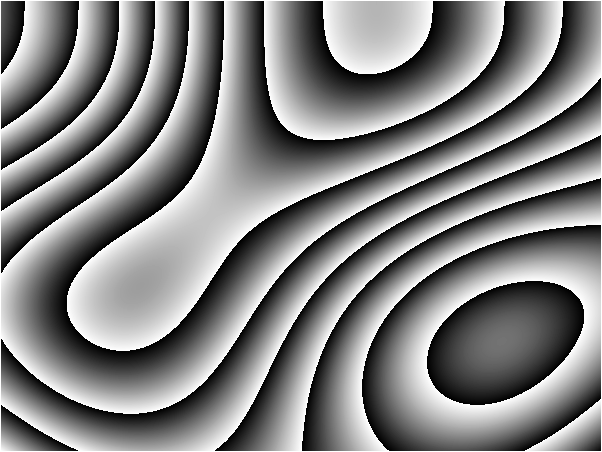

In [ ]:
I = plt.imread('noise.png')[:]
I = rgb2gray(I*255).astype('uint8')
draw(I,1,dpi=10, interpolation='none', cmap='gray');

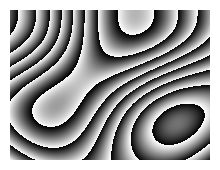

In [ ]:
factor = 3
I_downsampled = I[::factor,::factor]
draw(I_downsampled, 1, 100, interpolation='none', cmap='gray');

In [ ]:
I_interpolada = interpolate_image(I_downsampled, factor, kind='linear')
ecm(I_interpolada, I[:-2,:-2])

531.6082178690874

In [ ]:
assert np.allclose(ecm(I_interpolada, I[:-2,:-2]), 531.6082178690874)

In [ ]:
I_interpolada = interpolate_image(I_downsampled, factor, kind='cubic')
ecm(I_interpolada, I[:-2,:-2])

537.2296120998567

In [ ]:
assert np.allclose(ecm(I_interpolada, I[:-2,:-2]), 537.2296120998567)